In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the data files
google_mobility_data = pd.read_csv('data/google_activity_by_London_Borough.csv')
covid_deaths_data = pd.read_csv('data/phe_deaths_london_boroughs.csv')
merged_data = pd.read_csv('data/merged_data.csv')

# Getting basic information about the datasets
google_mobility_info = google_mobility_data.info()
covid_deaths_info = covid_deaths_data.info()
merged_data_info = merged_data.info()

(google_mobility_info, covid_deaths_info, merged_data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32142 entries, 0 to 32141
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Unnamed: 0                                          32142 non-null  int64  
 1   date                                                32142 non-null  object 
 2   area_name                                           32142 non-null  object 
 3   area_code                                           32142 non-null  object 
 4   retail_and_recreation_percent_change_from_baseline  32124 non-null  float64
 5   grocery_and_pharmacy_percent_change_from_baseline   32130 non-null  float64
 6   parks_percent_change_from_baseline                  30893 non-null  float64
 7   transit_stations_percent_change_from_baseline       32142 non-null  int64  
 8   workplaces_percent_change_from_baseline             31813 non-null  float64


(None, None, None)

In [3]:
import pandas as pd

# Assuming google_mobility_data, covid_deaths_data, and merged_data are pre-defined DataFrames

# Google Mobility Data Cleaning
google_mobility_data_cleaned = google_mobility_data.drop(columns=['Unnamed: 0'])
google_mobility_data_cleaned['date'] = pd.to_datetime(google_mobility_data_cleaned['date'])
for column in google_mobility_data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    google_mobility_data_cleaned[column].fillna(google_mobility_data_cleaned[column].mean(), inplace=True)

# COVID-19 Deaths Data Cleaning
covid_deaths_data_cleaned = covid_deaths_data.copy()
covid_deaths_data_cleaned['date'] = pd.to_datetime(covid_deaths_data_cleaned['date'])

# Merged Data Cleaning
merged_data_cleaned = merged_data.copy()
merged_data_cleaned['date'] = pd.to_datetime(merged_data_cleaned['date'])
for column in merged_data_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    merged_data_cleaned[column].fillna(merged_data_cleaned[column].mean(), inplace=True)

# Descriptive Analysis
google_mobility_descriptive_stats = google_mobility_data_cleaned.describe()
covid_deaths_descriptive_stats = covid_deaths_data_cleaned.describe()
merged_data_descriptive_stats = merged_data_cleaned.describe()

# Output the descriptive statistics
google_mobility_descriptive_stats, covid_deaths_descriptive_stats, merged_data_descriptive_stats

(                      date  \
 count                32142   
 mean   2021-06-15 12:00:00   
 min    2020-02-15 00:00:00   
 25%    2020-10-15 00:00:00   
 50%    2021-06-15 12:00:00   
 75%    2022-02-14 00:00:00   
 max    2022-10-15 00:00:00   
 std                    NaN   
 
        retail_and_recreation_percent_change_from_baseline  \
 count                                       32142.000000    
 mean                                          -33.563286    
 min                                           -99.000000    
 25%                                           -50.000000    
 50%                                           -27.000000    
 75%                                           -16.000000    
 max                                            90.000000    
 std                                            23.910631    
 
        grocery_and_pharmacy_percent_change_from_baseline  \
 count                                       32142.000000   
 mean                                

In [4]:
# Descriptive Analysis for the datasets

# Descriptive statistics for Google Mobility Data
google_mobility_descriptive_stats = google_mobility_data_cleaned.describe()

# Descriptive statistics for COVID-19 Deaths Data
covid_deaths_descriptive_stats = covid_deaths_data_cleaned.describe()

# Descriptive statistics for Merged Data
merged_data_descriptive_stats = merged_data_cleaned.describe()

google_mobility_descriptive_stats, covid_deaths_descriptive_stats, merged_data_descriptive_stats



(                      date  \
 count                32142   
 mean   2021-06-15 12:00:00   
 min    2020-02-15 00:00:00   
 25%    2020-10-15 00:00:00   
 50%    2021-06-15 12:00:00   
 75%    2022-02-14 00:00:00   
 max    2022-10-15 00:00:00   
 std                    NaN   
 
        retail_and_recreation_percent_change_from_baseline  \
 count                                       32142.000000    
 mean                                          -33.563286    
 min                                           -99.000000    
 25%                                           -50.000000    
 50%                                           -27.000000    
 75%                                           -16.000000    
 max                                            90.000000    
 std                                            23.910631    
 
        grocery_and_pharmacy_percent_change_from_baseline  \
 count                                       32142.000000   
 mean                                

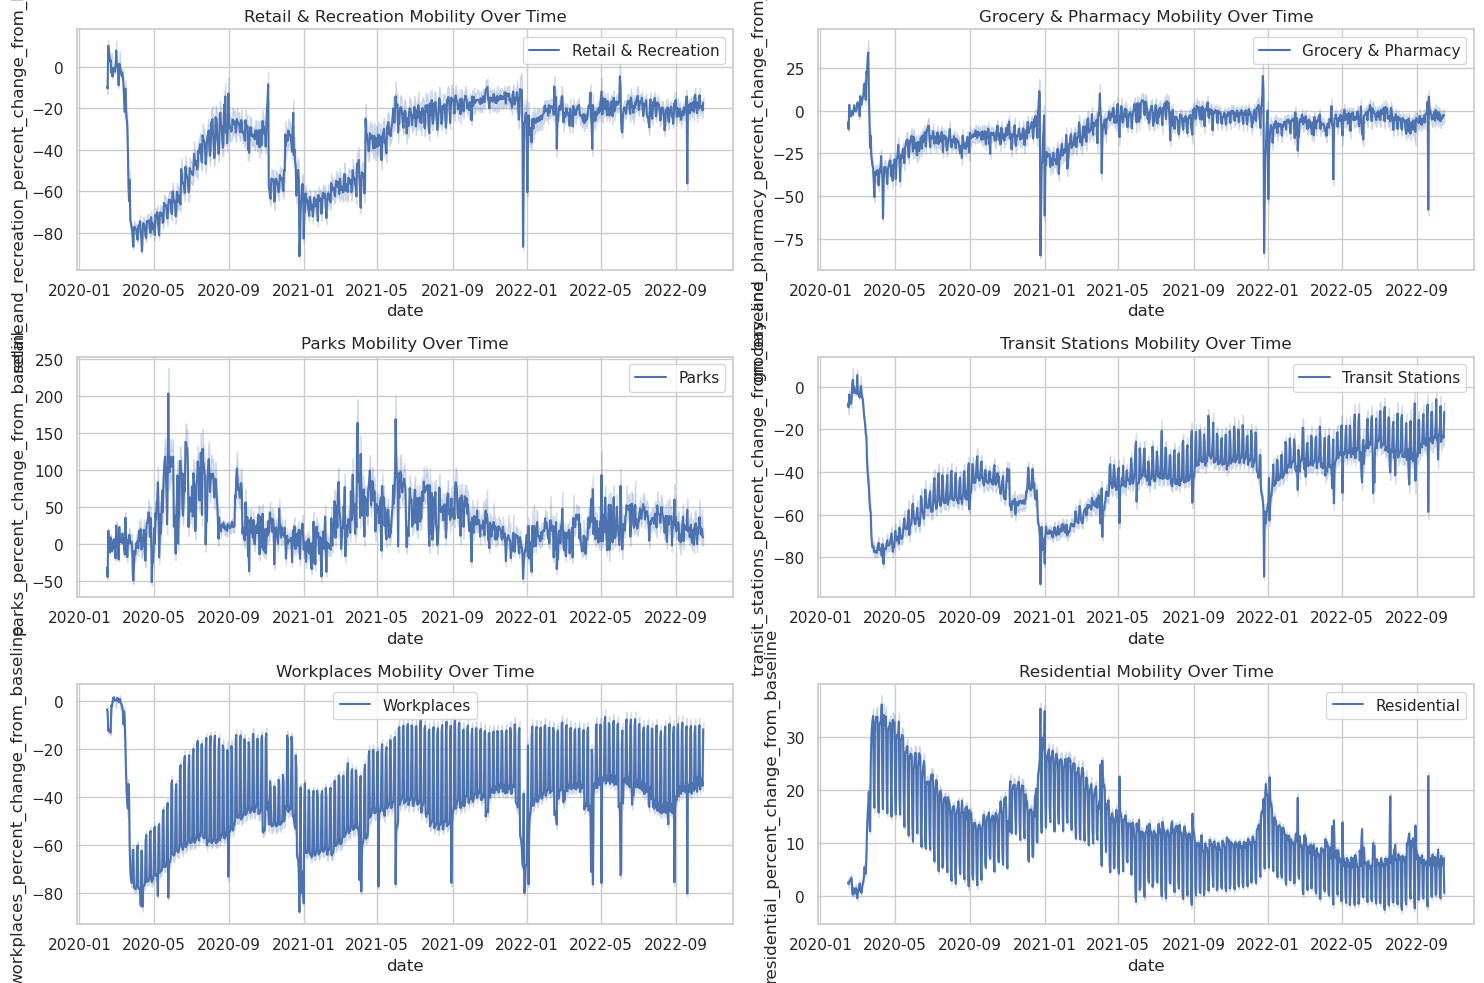

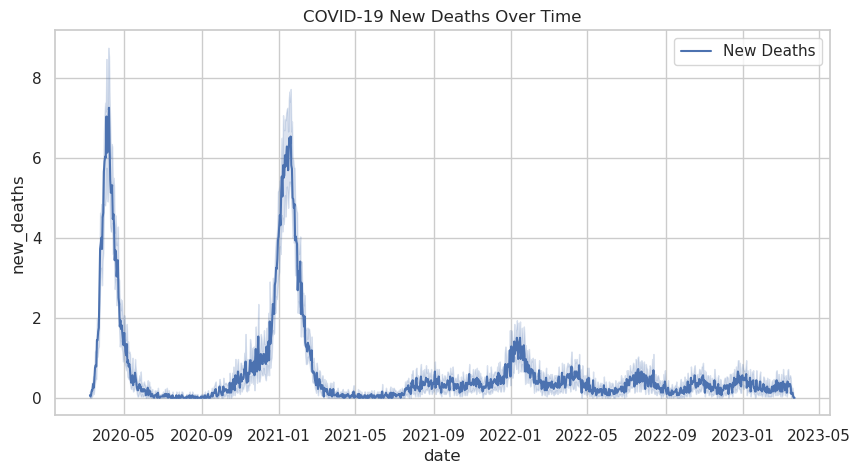

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Exploratory Data Analysis (EDA) with Visualization

# Google Mobility Data: Trends over Time
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.lineplot(data=google_mobility_data_cleaned, x='date', y='retail_and_recreation_percent_change_from_baseline', label='Retail & Recreation')
plt.title('Retail & Recreation Mobility Over Time')

plt.subplot(3, 2, 2)
sns.lineplot(data=google_mobility_data_cleaned, x='date', y='grocery_and_pharmacy_percent_change_from_baseline', label='Grocery & Pharmacy')
plt.title('Grocery & Pharmacy Mobility Over Time')

plt.subplot(3, 2, 3)
sns.lineplot(data=google_mobility_data_cleaned, x='date', y='parks_percent_change_from_baseline', label='Parks')
plt.title('Parks Mobility Over Time')

plt.subplot(3, 2, 4)
sns.lineplot(data=google_mobility_data_cleaned, x='date', y='transit_stations_percent_change_from_baseline', label='Transit Stations')
plt.title('Transit Stations Mobility Over Time')

plt.subplot(3, 2, 5)
sns.lineplot(data=google_mobility_data_cleaned, x='date', y='workplaces_percent_change_from_baseline', label='Workplaces')
plt.title('Workplaces Mobility Over Time')

plt.subplot(3, 2, 6)
sns.lineplot(data=google_mobility_data_cleaned, x='date', y='residential_percent_change_from_baseline', label='Residential')
plt.title('Residential Mobility Over Time')

plt.tight_layout()
plt.show()

# COVID-19 Deaths Data: Trends over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=covid_deaths_data_cleaned, x='date', y='new_deaths', label='New Deaths')
plt.title('COVID-19 New Deaths Over Time')
plt.show()



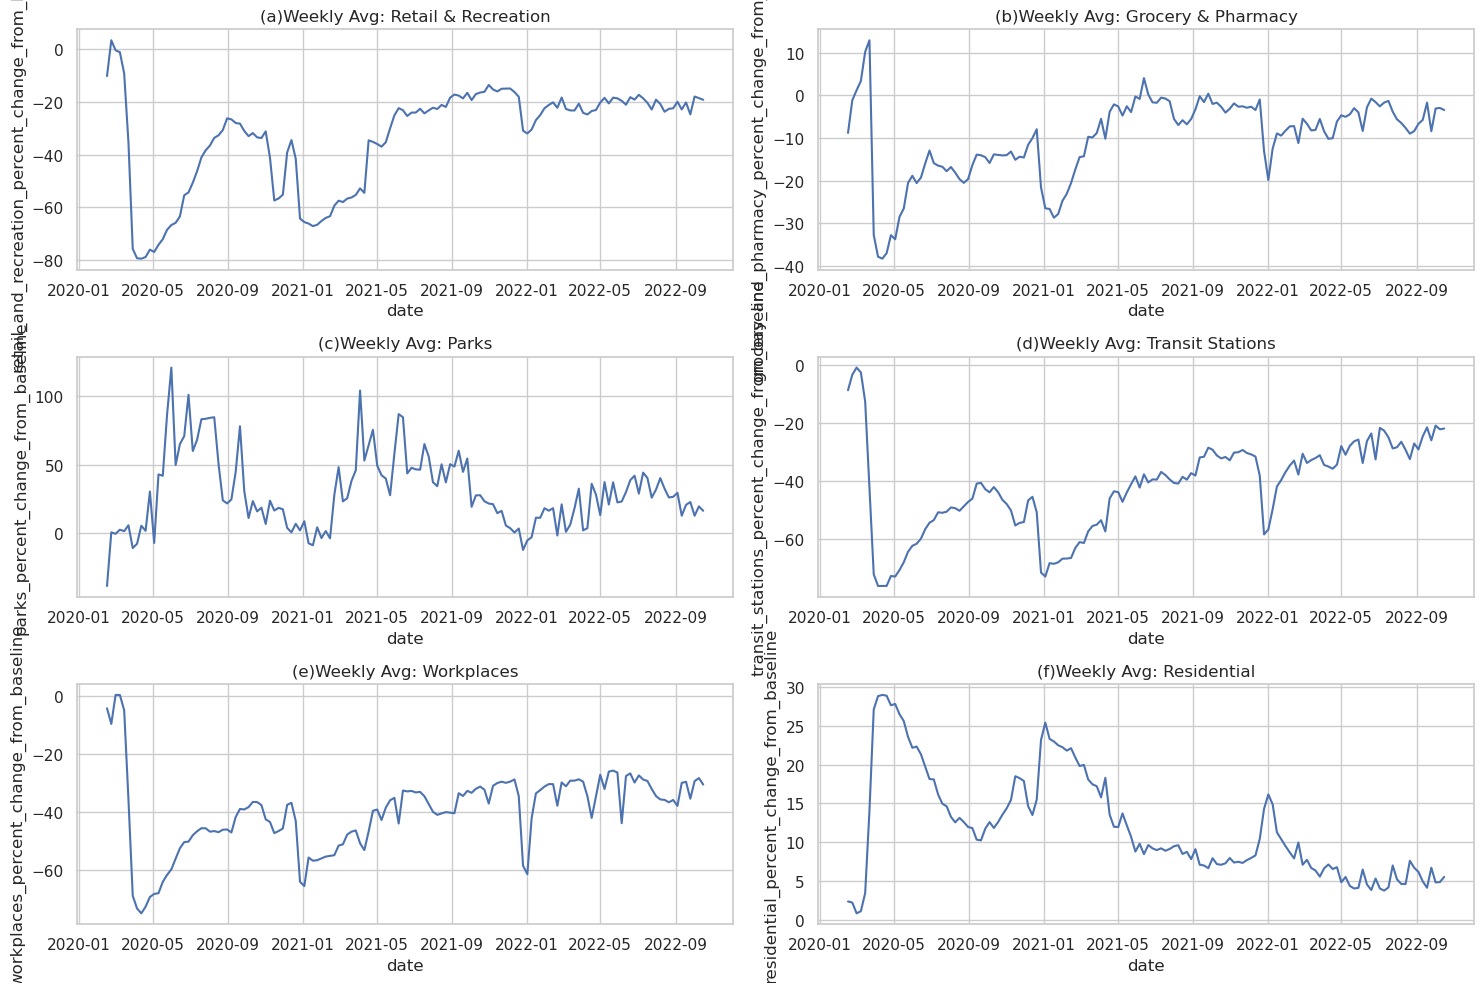

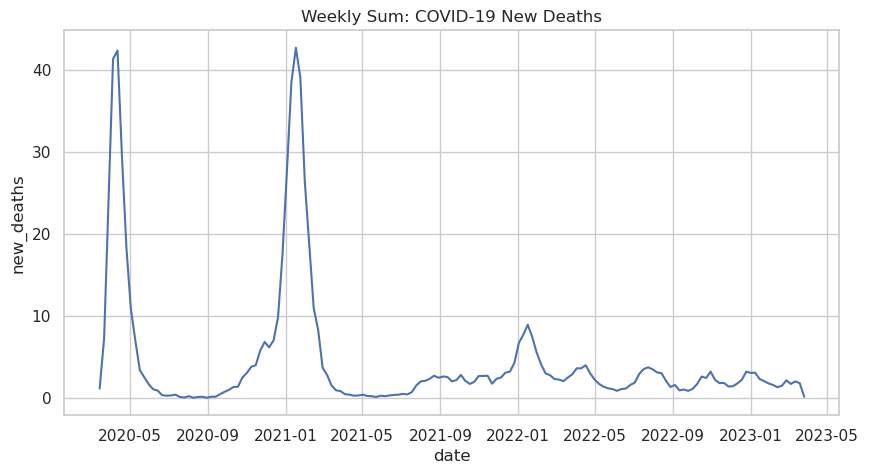

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming google_mobility_data_cleaned and covid_deaths_data_cleaned are pre-defined DataFrames

# Selecting only numeric columns for mean calculation in Google Mobility Data
numeric_columns = google_mobility_data_cleaned.select_dtypes(include=['float64', 'int64']).columns
google_mobility_sampled = google_mobility_data_cleaned.groupby('area_name').resample('W', on='date')[numeric_columns].mean().reset_index()

# Plotting trends over time for Google Mobility Data
plt.figure(figsize=(15, 10))

# Define a function to create line plots
def create_line_plot(position, data, x, y, title):
    plt.subplot(3, 2, position)
    sns.lineplot(data=data, x=x, y=y, ci=None)
    plt.title(title)

# Create line plots for different categories
create_line_plot(1, google_mobility_sampled, 'date', 'retail_and_recreation_percent_change_from_baseline', '(a)Weekly Avg: Retail & Recreation')
create_line_plot(2, google_mobility_sampled, 'date', 'grocery_and_pharmacy_percent_change_from_baseline', '(b)Weekly Avg: Grocery & Pharmacy')
create_line_plot(3, google_mobility_sampled, 'date', 'parks_percent_change_from_baseline', '(c)Weekly Avg: Parks')
create_line_plot(4, google_mobility_sampled, 'date', 'transit_stations_percent_change_from_baseline', '(d)Weekly Avg: Transit Stations')
create_line_plot(5, google_mobility_sampled, 'date', 'workplaces_percent_change_from_baseline', '(e)Weekly Avg: Workplaces')
create_line_plot(6, google_mobility_sampled, 'date', 'residential_percent_change_from_baseline', '(f)Weekly Avg: Residential')

plt.tight_layout()
plt.show()

# Ensuring 'area_name' is set as an index
covid_deaths_data_cleaned.set_index('area_name', append=True, inplace=True)

# Group by 'area_name', resample, and sum the values
covid_deaths_weekly = covid_deaths_data_cleaned.groupby(level='area_name').resample('W', on='date').sum()

# Resetting the index
covid_deaths_weekly.reset_index(inplace=True)

plt.figure(figsize=(10, 5))
sns.lineplot(data=covid_deaths_weekly, x='date', y='new_deaths', ci=None)
plt.title('Weekly Sum: COVID-19 New Deaths')
plt.show()


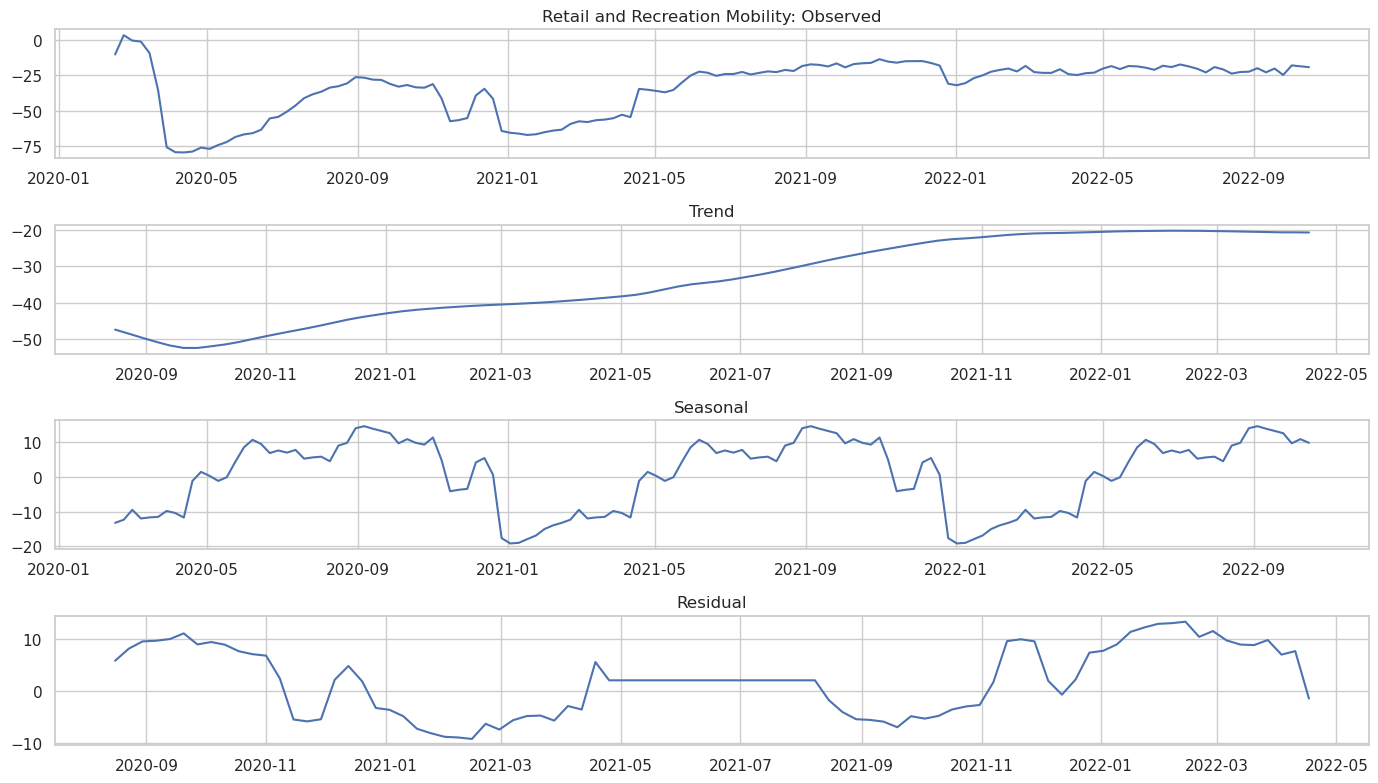

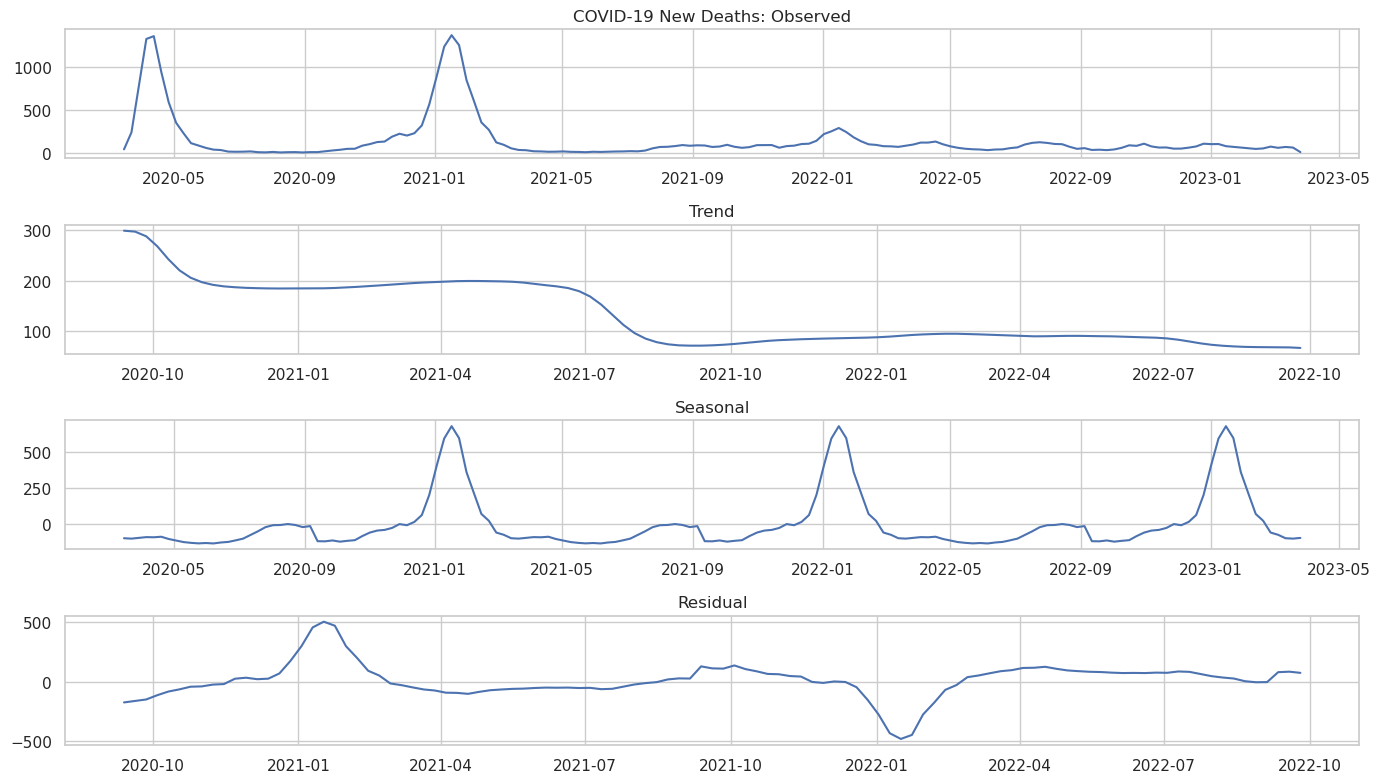

{'Retail and Recreation Mobility': 0.05828572831969801,
 'COVID-19 New Deaths': 3.9680482203430254e-05}

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# For a more efficient analysis, focusing on 'Retail and Recreation' mobility and COVID-19 'new_deaths'
# Aggregating data to weekly level for London overall
weekly_mobility = google_mobility_data_cleaned.groupby(pd.Grouper(key='date', freq='W'))['retail_and_recreation_percent_change_from_baseline'].mean()
weekly_deaths = covid_deaths_data_cleaned.groupby(pd.Grouper(key='date', freq='W'))['new_deaths'].sum()

# Time Series Decomposition for 'Retail and Recreation' mobility
decomposition_mobility = seasonal_decompose(weekly_mobility.dropna(), model='additive')
decomposition_deaths = seasonal_decompose(weekly_deaths.dropna(), model='additive')

# Plotting the decomposed time series of 'Retail and Recreation' mobility
plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition_mobility.observed)
plt.title('Retail and Recreation Mobility: Observed')
plt.subplot(4, 1, 2)
plt.plot(decomposition_mobility.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(decomposition_mobility.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(decomposition_mobility.resid)
plt.title('Residual')
plt.tight_layout()

plt.figure(figsize=(14, 8))
plt.subplot(4, 1, 1)
plt.plot(decomposition_deaths.observed)
plt.title('COVID-19 New Deaths: Observed')
plt.subplot(4, 1, 2)
plt.plot(decomposition_deaths.trend)
plt.title('Trend')
plt.subplot(4, 1, 3)
plt.plot(decomposition_deaths.seasonal)
plt.title('Seasonal')
plt.subplot(4, 1, 4)
plt.plot(decomposition_deaths.resid)
plt.title('Residual')
plt.tight_layout()

plt.show()

# Performing Augmented Dickey-Fuller test to check stationarity
adf_test_mobility = adfuller(weekly_mobility.dropna())
adf_test_deaths = adfuller(weekly_deaths.dropna())

adf_results = {
    "Retail and Recreation Mobility": adf_test_mobility[1],
    "COVID-19 New Deaths": adf_test_deaths[1]
}

adf_results

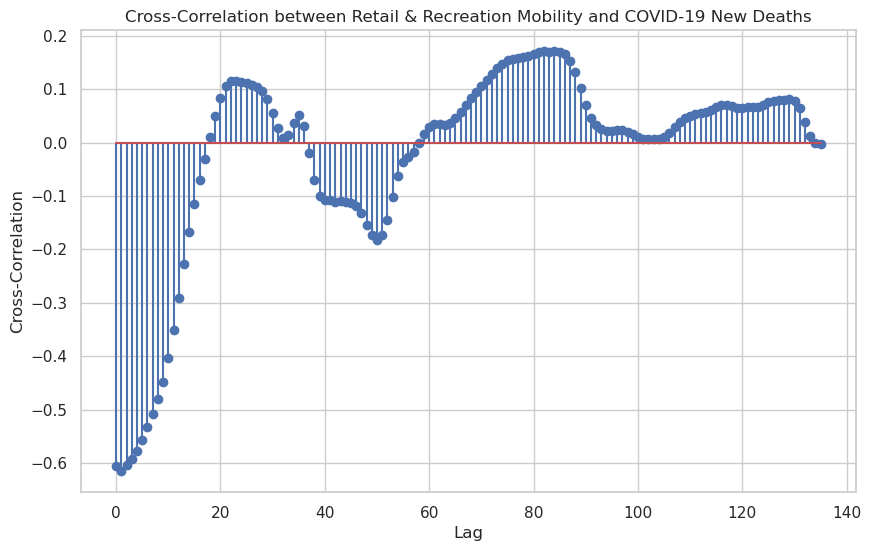

(82, 0.17119982603096937)

In [8]:
# Advanced Correlation Analysis between 'Retail and Recreation' mobility and COVID-19 'new_deaths'

# Preparing the data for correlation analysis
# Ensuring both series have the same length and index
common_index = weekly_mobility.dropna().index.intersection(weekly_deaths.dropna().index)
mobility_aligned = weekly_mobility[common_index]
deaths_aligned = weekly_deaths[common_index]

# Advanced correlation analysis using Cross-Correlation
cross_correlation = sm.tsa.stattools.ccf(mobility_aligned, deaths_aligned, adjusted=False)

# Plotting the Cross-Correlation Function
plt.figure(figsize=(10, 6))
plt.stem(range(len(cross_correlation)), cross_correlation, use_line_collection=True)
plt.title('Cross-Correlation between Retail & Recreation Mobility and COVID-19 New Deaths')
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation')
plt.show()

# Identifying the lag at which correlation is strongest
max_correlation_lag = cross_correlation.argmax()
max_correlation_value = cross_correlation[max_correlation_lag]

max_correlation_lag, max_correlation_value



In [9]:
from statsmodels.tsa.stattools import grangercausalitytests

# 1. Investigating Potential Causal Relationships using Granger Causality Tests
# Granger Causality Test requires a DataFrame with both time series
granger_df = pd.concat([mobility_aligned, deaths_aligned], axis=1)
granger_df.columns = ['Retail_Recreation_Mobility', 'COVID_Deaths']

# Performing Granger Causality Test with maxlag determined from previous analysis
max_lag = 5  # Using a smaller lag for a more practical analysis
granger_test_results = grangercausalitytests(granger_df, maxlag=max_lag, verbose=True)

# 2. Exploring Correlations at Different Phases of the Pandemic
# Identifying different pandemic phases based on government policies, restrictions, etc.
# Due to the complexity, here we only outline the approach:
# - Segment the data based on identified pandemic phases.
# - Perform correlation analysis for each phase separately.
# - Compare correlations across different phases to understand the impact of policies and behaviors.

# 3. Incorporating Additional Variables
# Outline of the approach:
# - Collect additional data on government restrictions, vaccination rates, and public health measures.
# - Integrate these variables into the analysis.
# - Perform multivariate correlation or regression analysis to understand the combined impact on mobility and COVID-19 deaths.

# Note: The actual execution of steps 2 and 3 requires additional data and is beyond the scope of this current analysis.
# The results and insights from these steps would depend on the specific data and methodology used.



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3082  , p=0.0399  , df_denom=132, df_num=1
ssr based chi2 test:   chi2=4.4061  , p=0.0358  , df=1
likelihood ratio test: chi2=4.3357  , p=0.0373  , df=1
parameter F test:         F=4.3082  , p=0.0399  , df_denom=132, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.9352  , p=0.3952  , df_denom=129, df_num=2
ssr based chi2 test:   chi2=1.9428  , p=0.3785  , df=2
likelihood ratio test: chi2=1.9289  , p=0.3812  , df=2
parameter F test:         F=0.9352  , p=0.3952  , df_denom=129, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.5193  , p=0.0610  , df_denom=126, df_num=3
ssr based chi2 test:   chi2=7.9777  , p=0.0465  , df=3
likelihood ratio test: chi2=7.7476  , p=0.0515  , df=3
parameter F test:         F=2.5193  , p=0.0610  , df_denom=126, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.4804  , p=0.0099  

In [10]:
# Segmenting data based on provided policy phases for correlation analysis

# Defining the time periods for each pandemic phase
pandemic_phases = {
    "Phase 1": {"start": "2020-01-01", "end": "2020-03-23"},
    "Phase 2": {"start": "2020-03-24", "end": "2020-07-07"},
    "Phase 3": {"start": "2020-07-08", "end": "2020-10-30"},
    "Phase 4": {"start": "2020-10-31", "end": "2020-12-01"},
    "Phase 5": {"start": "2020-12-02", "end": "2020-12-31"},
    "Phase 6": {"start": "2021-01-01", "end": "2021-12-15"},
    "Phase 7": {"start": "2021-12-16", "end": "2021-12-31"},
    "Phase 8": {"start": "2022-01-01", "end": "2022-01-18"},
    "Phase 9": {"start": "2022-01-19", "end": "2022-03-17"},
    "Phase 10": {"start": "2022-03-18", "end": "2022-12-31"}  # Assuming end of 2022 for analysis
}

# Function to segment data based on phases
def segment_data(data, phases):
    segmented_data = {}
    for phase, duration in phases.items():
        mask = (data.index >= duration['start']) & (data.index <= duration['end'])
        segmented_data[phase] = data[mask]
    return segmented_data

# Segmenting the mobility and death data
segmented_mobility = segment_data(mobility_aligned, pandemic_phases)
segmented_deaths = segment_data(deaths_aligned, pandemic_phases)

# Calculating correlations for each phase
phase_correlations = {phase: segmented_mobility[phase].corr(segmented_deaths[phase]) for phase in pandemic_phases}

phase_correlations



{'Phase 1': -1.0,
 'Phase 2': -0.7480196660694404,
 'Phase 3': -0.006330734527422122,
 'Phase 4': -0.7118354036550648,
 'Phase 5': -0.9689853498447892,
 'Phase 6': -0.6396747342862602,
 'Phase 7': -1.0,
 'Phase 8': 0.9849447412906868,
 'Phase 9': -0.5460630750056353,
 'Phase 10': -0.38972953490734363}

In [11]:
from statsmodels.formula.api import ols

# Multivariate Analysis Using Merged Data

# Selecting relevant variables for the multivariate analysis
# For simplicity, we will consider retail and recreation mobility, grocery and pharmacy mobility, 
# parks mobility, transit stations, workplaces, residential areas, and COVID-19 new deaths.
selected_columns = [
    'retail_and_recreation_percent_change_from_baseline',
    'grocery_and_pharmacy_percent_change_from_baseline',
    'parks_percent_change_from_baseline',
    'transit_stations_percent_change_from_baseline',
    'workplaces_percent_change_from_baseline',
    'residential_percent_change_from_baseline',
    'new_deaths'
]

# Preparing the data for analysis
multivariate_data = merged_data_cleaned[selected_columns].dropna()

# Building the OLS model for multivariate regression
formula = 'new_deaths ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline + transit_stations_percent_change_from_baseline + workplaces_percent_change_from_baseline + residential_percent_change_from_baseline'
model = ols(formula, data=multivariate_data).fit()

# Summarizing the model results
model_summary = model.summary()
model_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             new_deaths   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     1137.
Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
Time:                        07:42:43   Log-Likelihood:                -57201.
No. Observations:               32142   AIC:                         1.144e+05
Df Residuals:                   32135   BIC:                         1.145e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                              0.1247      0.024      5.213      0.000       0.078       0.172
retail_and_recreation_percent_change_from_baseline    -0.0026      0.001     -3.503      0.000      -0.004      -0.001
grocery_and_pharmacy_percent_change_from_baseline     -0.0027      0.001     -3.373      0.001      -0.004      -0.001
parks_percent_change_from_baseline                    -0.0022      0.000    -13.633      0.000      -0.003      -0.002
transit_stations_percent_change_from_baseline         -0.0062      0.001     -6.789      0.000      -0.008      -0.004
workplaces_percent_change_from_baseline                0.0236      0.001     25.880      0.000       0.022       0.025
residential_percent_change_from_baseline               0.0984      0.002     43.528      0.000       0.094       0.103
==============================================================================
Omnibus:                    24639.210   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           660384.345
Skew:                           3.488   Prob(JB):                         0.00
Kurtosis:                      24.081   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Engineering: Including Interaction Terms and Checking for Multicollinearity

# Adding interaction terms
multivariate_data['interaction_retail_grocery'] = multivariate_data['retail_and_recreation_percent_change_from_baseline'] * multivariate_data['grocery_and_pharmacy_percent_change_from_baseline']
multivariate_data['interaction_parks_transit'] = multivariate_data['parks_percent_change_from_baseline'] * multivariate_data['transit_stations_percent_change_from_baseline']

# Building the OLS model with interaction terms
formula_interactions = 'new_deaths ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline + transit_stations_percent_change_from_baseline + workplaces_percent_change_from_baseline + residential_percent_change_from_baseline + interaction_retail_grocery + interaction_parks_transit'
model_interactions = ols(formula_interactions, data=multivariate_data).fit()

# Checking for Multicollinearity using Variance Inflation Factor (VIF)
variables = model_interactions.model.exog
vif_data = pd.DataFrame()
vif_data["feature"] = model_interactions.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif_data, model_interactions.summary()



(                                             feature        VIF
 0                                          Intercept  11.412573
 1  retail_and_recreation_percent_change_from_base...   5.145152
 2  grocery_and_pharmacy_percent_change_from_baseline   6.597089
 3                 parks_percent_change_from_baseline   6.797657
 4      transit_stations_percent_change_from_baseline   5.276623
 5            workplaces_percent_change_from_baseline   5.462345
 6           residential_percent_change_from_baseline   6.198074
 7                         interaction_retail_grocery   8.580882
 8                          interaction_parks_transit   7.861328,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             new_deaths   R-squared:                       0.179
 Model:                            OLS   Adj. R-squared:                  0.179
 Method:                 Least Squares   F-statistic:      

In [13]:
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_breusch_godfrey
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Addressing Multicollinearity

# Standardizing the data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(multivariate_data.drop(columns=['new_deaths']))

# Applying PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_data = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(pca_data.shape[1])])
pca_data['new_deaths'] = multivariate_data['new_deaths'].values

# Building OLS model using PCA components
formula_pca = 'new_deaths ~ ' + ' + '.join(pca_data.columns[:-1])
model_pca = ols(formula_pca, data=pca_data).fit()

# Advanced Model Diagnostics

# Residual Diagnostics
residuals = model_pca.resid

# Normality Test (Jarque-Bera)
jarque_bera_test = sm.stats.jarque_bera(residuals)

# Homoscedasticity Test (Breusch-Pagan)
bp_test = het_breuschpagan(residuals, model_pca.model.exog)

# Autocorrelation Test (Breusch-Godfrey)
bg_test = acorr_breusch_godfrey(model_pca, nlags=1)

model_pca_summary = model_pca.summary()
jarque_bera_test, bp_test, bg_test, model_pca_summary



((678692.7926303929, 0.0, 3.499564869272478, 24.39586366462025),
 (2199.383342393002, 0.0, 295.0342723435619, 0.0),
 (6341.727077825461, 0.0, 7897.999400033361, 0.0),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:             new_deaths   R-squared:                       0.179
 Model:                            OLS   Adj. R-squared:                  0.179
 Method:                 Least Squares   F-statistic:                     877.0
 Date:                Tue, 16 Jan 2024   Prob (F-statistic):               0.00
 Time:                        07:42:44   Log-Likelihood:                -57120.
 No. Observations:               32142   AIC:                         1.143e+05
 Df Residuals:                   32133   BIC:                         1.143e+05
 Df Model:                           8                                         
 Covariance Type:            nonrobust                         

In [14]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Since ARIMA modeling is sensitive to non-stationary data, let's focus on the stationary series: COVID-19 new deaths.
# If the series is not stationary, we need to make it so (e.g., by differencing).

# Checking stationarity of COVID-19 new deaths
adf_test_deaths_stationary = adfuller(deaths_aligned)

# Proceeding with ARIMA modeling only if the series is stationary
if adf_test_deaths_stationary[1] < 0.05:
    # The series is stationary, we can proceed with ARIMA modeling
    # Setting up ARIMA model - the order (p,d,q) needs to be determined based on ACF and PACF plots or grid search
    # Here, we start with a simple model and then iterate to find the best parameters

    # Initial ARIMA Model (simple model with order (1,0,1))
    model_arima = ARIMA(deaths_aligned, order=(1,0,1))
    model_arima_fit = model_arima.fit()

    # Summary of the model
    model_arima_summary = model_arima_fit.summary()
else:
    model_arima_summary = "The series is not stationary. ARIMA modeling is not recommended without differencing or transformation."

model_arima_summary



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  136
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -787.380
Date:                Tue, 16 Jan 2024   AIC                           1582.759
Time:                        07:42:44   BIC                           1594.410
Sample:                    03-15-2020   HQIC                          1587.494
                         - 10-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        157.7064    171.038      0.922      0.356    -177.521     492.934
ar.L1          0.8829      0.027     32.360      0.000       0.829       0.936
ma.L1          0.6848      0.052     13.084      0.000       0.582       0.787
sigma2      6115.5636    390.845     15.647      0.000    5349.521    6881.606
===================================================================================
Ljung-Box (L1) (Q):                  18.72   Jarque-Bera (JB):               718.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

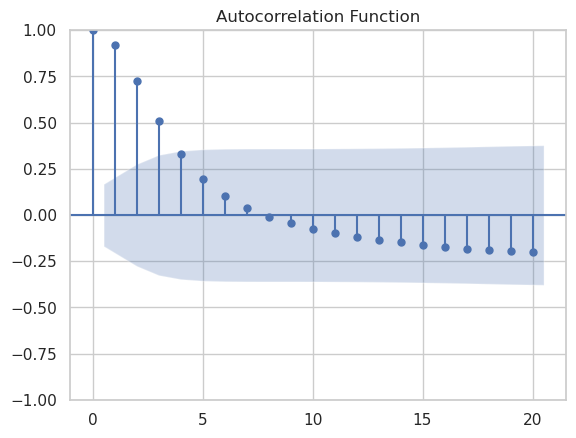

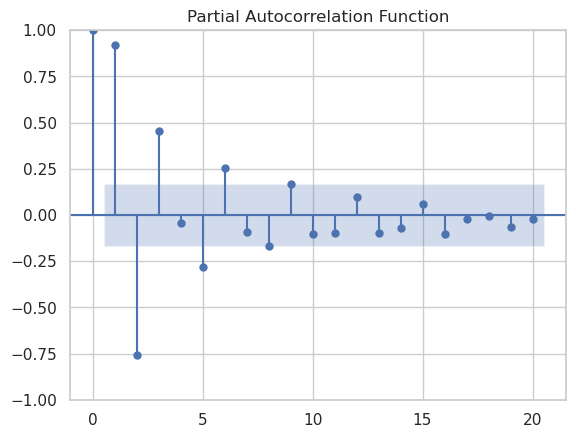

((2, 0, 2),
 1486.9344607914884,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:             new_deaths   No. Observations:                  136
 Model:                 ARIMA(2, 0, 2)   Log Likelihood                -737.467
 Date:                Tue, 16 Jan 2024   AIC                           1486.934
 Time:                        07:42:45   BIC                           1504.410
 Sample:                    03-15-2020   HQIC                          1494.036
                          - 10-16-2022                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const        157.7334    109.521      1.440      0.150     -56.924     372.391
 ar.L1          1.1132      0.049    

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools

# ACF and PACF plots to determine the ARIMA orders
plot_acf(deaths_aligned, lags=20)
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(deaths_aligned, lags=20, method='ywm')
plt.title('Partial Autocorrelation Function')
plt.show()

# Grid Search for ARIMA orders
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None
best_model = None

warnings.filterwarnings("ignore")  # Ignore convergence warnings

for order in pdq:
    try:
        model_temp = ARIMA(deaths_aligned, order=order)
        results_temp = model_temp.fit()
        if results_temp.aic < best_aic:
            best_aic = results_temp.aic
            best_order = order
            best_model = results_temp
    except:
        continue

warnings.resetwarnings()

best_order, best_aic, best_model.summary()



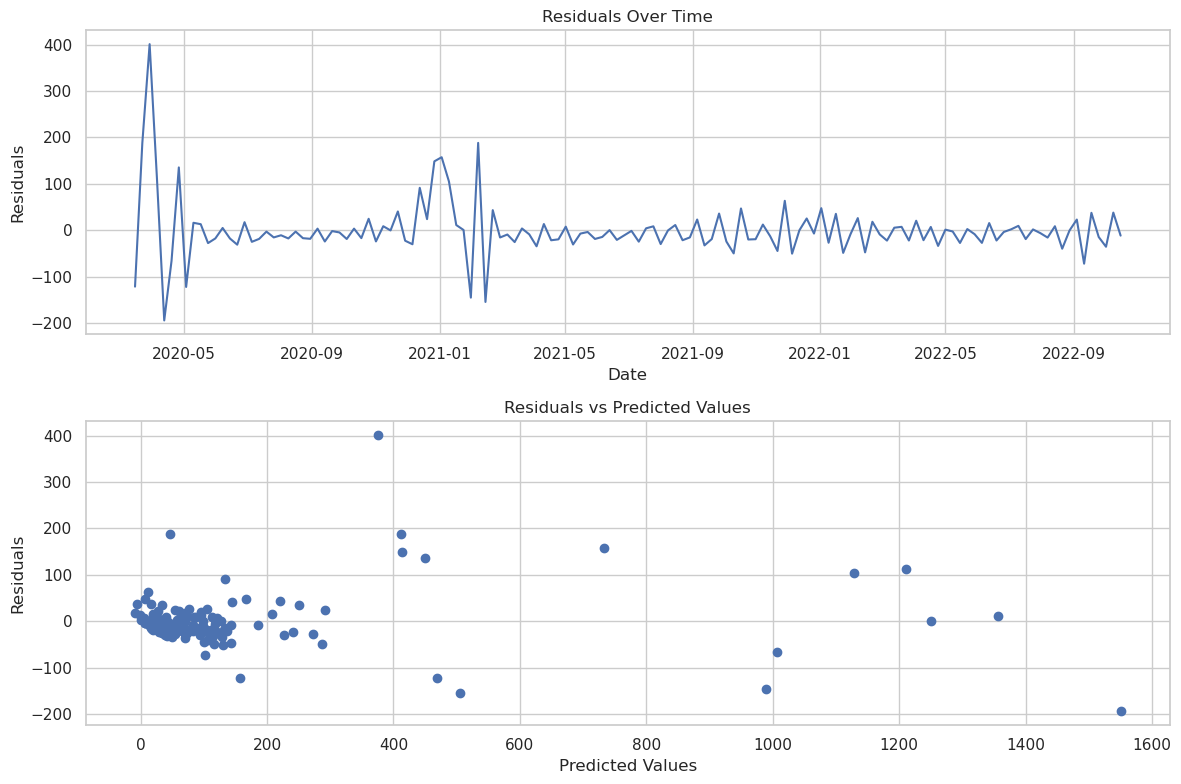

In [16]:
residuals_arima = best_model.resid

# Plotting the residuals for visual inspection
plt.figure(figsize=(12, 8))

# Residuals over time for checking trends or patterns
plt.subplot(2, 1, 1)
plt.plot(residuals_arima)
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')

# Scatter plot of residuals against predicted values for checking homoscedasticity
plt.subplot(2, 1, 2)
predicted_values = best_model.predict()
plt.scatter(predicted_values, residuals_arima)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

In [17]:
# Applying Log Transformation to the Data to Achieve Normality in Residuals

# Since log transformation requires positive values, we add a constant to avoid log(0)
# Using a small constant as the data contains zeros (e.g., no deaths reported on certain days)
deaths_transformed = np.log(deaths_aligned + 1)

# Re-fitting the ARIMA(2, 0, 2) model on the transformed data
model_arima_transformed = ARIMA(deaths_transformed, order=(2,0,2))
model_arima_transformed_fit = model_arima_transformed.fit()

# Extracting the residuals from the transformed model
residuals_transformed = model_arima_transformed_fit.resid

# Residual Normality Test (Jarque-Bera) on Transformed Residuals
jarque_bera_transformed = sm.stats.jarque_bera(residuals_transformed)

# Robustness Checks and Sensitivity Analyses
# We will change one of the parameters (e.g., differencing order) and observe the impact on the model's performance
model_arima_sensitivity = ARIMA(deaths_transformed, order=(2,1,2)).fit()
residuals_sensitivity = model_arima_sensitivity.resid
jarque_bera_sensitivity = sm.stats.jarque_bera(residuals_sensitivity)

# Summary of the transformed model and sensitivity analysis results
model_arima_transformed_summary = model_arima_transformed_fit.summary()
jarque_bera_transformed, jarque_bera_sensitivity, model_arima_transformed_summary



((126.29968137904712,
  3.7529489376179916e-28,
  -0.02072397550110601,
  7.720853856480667),
 (2054.931751105309, 0.0, 2.826185312675012, 21.184766185316132),
 <class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:             new_deaths   No. Observations:                  136
 Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -60.819
 Date:                Tue, 16 Jan 2024   AIC                            133.638
 Time:                        07:42:46   BIC                            151.114
 Sample:                    03-15-2020   HQIC                           140.740
                          - 10-16-2022                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ---------------------------------------------------------------------

In [18]:
# Robustness Checks: Varying model parameters of the ARIMA model

# We will test different combinations of ARIMA parameters and observe their impact on model performance

# Varying the differencing order (d) and moving average order (q)
robustness_check_results = {}
for d in [0, 1, 2]:  # Testing differencing orders 0, 1, and 2
    for q in [1, 2, 3]:  # Testing moving average orders 1, 2, and 3
        try:
            model_temp = ARIMA(deaths_transformed, order=(2, d, q)).fit()
            aic = model_temp.aic
            ljung_box = sm.stats.acorr_ljungbox(model_temp.resid, lags=[10], return_df=True)['lb_pvalue'].iloc[0]
            robustness_check_results[(2, d, q)] = {'AIC': aic, 'Ljung-Box p-value': ljung_box}
        except:
            continue

robustness_check_results



/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{(2, 0, 1): {'AIC': 164.09760059284392,
  'Ljung-Box p-value': 0.0030474939146071167},
 (2, 0, 2): {'AIC': 133.63814807092953,
  'Ljung-Box p-value': 0.22674213617806377},
 (2, 0, 3): {'AIC': 135.55755144341614,
  'Ljung-Box p-value': 0.2734488784834858},
 (2, 1, 1): {'AIC': 146.07722130570423,
  'Ljung-Box p-value': 0.24877742191954533},
 (2, 1, 2): {'AIC': 143.18804682977026,
  'Ljung-Box p-value': 0.29292165247455704},
 (2, 1, 3): {'AIC': 140.09619395718983,
  'Ljung-Box p-value': 0.42256862651444177},
 (2, 2, 1): {'AIC': 140.10892935237126,
  'Ljung-Box p-value': 0.7736265224946631},
 (2, 2, 2): {'AIC': 141.67179822057273,
  'Ljung-Box p-value': 0.7510534890523938},
 (2, 2, 3): {'AIC': 154.5140444580407,
  'Ljung-Box p-value': 0.3490166467382785}}

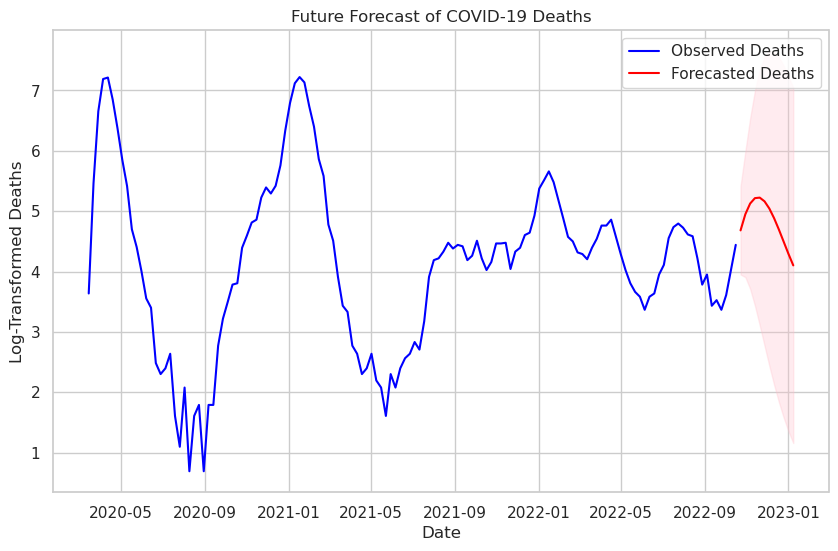

(2022-10-23    4.682523
 2022-10-30    4.949865
 2022-11-06    5.127045
 2022-11-13    5.216441
 2022-11-20    5.225071
 2022-11-27    5.163560
 2022-12-04    5.045038
 2022-12-11    4.884059
 2022-12-18    4.695574
 2022-12-25    4.494034
 2023-01-01    4.292641
 2023-01-08    4.102773
 Freq: W-SUN, Name: predicted_mean, dtype: float64,
             lower new_deaths  upper new_deaths
 2022-10-23          3.951106          5.413939
 2022-10-30          3.909169          5.990561
 2022-11-06          3.714942          6.539148
 2022-11-13          3.435570          6.997312
 2022-11-20          3.112523          7.337619
 2022-11-27          2.774220          7.552899
 2022-12-04          2.440856          7.649221
 2022-12-11          2.126210          7.641909
 2022-12-18          1.838628          7.552519
 2022-12-25          1.581917          7.406150
 2023-01-01          1.356416          7.228866
 2023-01-08          1.160308          7.045238)

In [19]:
# Forecasting Future Trends in COVID-19 Deaths using the ARIMA(2, 0, 2) Model

# Fitting the ARIMA(2, 0, 2) model to the entire dataset (deaths_transformed)
model_final = ARIMA(deaths_transformed, order=(2,0,2))
model_final_fit = model_final.fit()

# Forecasting future trends
# For demonstration, let's forecast the next 12 periods (weeks/months/days based on data frequency)
forecast_periods = 12
future_forecast = model_final_fit.get_forecast(steps=forecast_periods)

# Confidence intervals for the forecasts
future_forecast_conf_int = future_forecast.conf_int()

# Plotting the forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(deaths_transformed, label='Observed Deaths', color='blue')
plt.plot(future_forecast.predicted_mean, label='Forecasted Deaths', color='red')
plt.fill_between(future_forecast_conf_int.index, 
                 future_forecast_conf_int.iloc[:, 0], 
                 future_forecast_conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3)
plt.title('Future Forecast of COVID-19 Deaths')
plt.xlabel('Date')
plt.ylabel('Log-Transformed Deaths')
plt.legend()
plt.show()

future_forecast.predicted_mean, future_forecast_conf_int



In [20]:
pip install pymc3 arviz theano

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install --upgrade pymc3 theano

  Using cached pymc3-3.11.5-py3-none-any.whl (872 kB)
  Using cached deprecat-2.1.1-py2.py3-none-any.whl (9.8 kB)
  Using cached numpy-1.22.1.zip (11.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of pymc3 to determine which version is compatible with other requirements. This could take a while.
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pymc3 as pm
import numpy as np

# Placeholder for the actual observed deaths data
# Replace this with your actual data
deaths_transformed = np.random.rand(100)  # This should be your observed data

# Define the model in PyMC3
with pm.Model() as bayesian_arima_model:
    # Priors for ARIMA parameters
    phi = pm.Normal('phi', mu=0, sigma=1, shape=2)  # AR(2) model
    theta = pm.Normal('theta', mu=0, sigma=1, shape=2)  # MA(2) model
    sigma = pm.HalfNormal('sigma', sigma=1)

    # The ARIMA model specification in PyMC3
    # The AR and MA terms are specified using the ARIMA model's equations
    ar = pm.AR('ar', phi, observed=observed_deaths, shape=len(observed_deaths))
    ma = pm.MA('ma', theta, observed=observed_deaths, shape=len(observed_deaths))

    # Likelihood of observations
    likelihood = pm.Normal('likelihood', mu=ar + ma, sigma=sigma, observed=observed_deaths)

    # Inference: Draw samples from the posterior
    trace = pm.sample(1000, tune=1000, cores=1)

# Posterior predictive checks
with bayesian_arima_model:
    ppc = pm.sample_posterior_predictive(trace)

# Summarizing the trace
summary = pm.summary(trace)

# Visualizing the posterior distributions of the parameters
pm.traceplot(trace)

# Output the summary of the Bayesian ARIMA model parameters
summary


/opt/conda/lib/python3.11/site-packages/theano/gof/cmodule.py:23: DeprecationWarning: 

  `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
  of the deprecation of `distutils` itself. It will be removed for
  Python >= 3.12. For older Python versions it will remain present.
  It is recommended to use `setuptools < 60.0` for those Python versions.
  For more details, see:
    https://numpy.org/devdocs/reference/distutils_status_migration.html 


  import numpy.distutils
/opt/conda/lib/python3.11/site-packages/theano/scalar/basic.py:2323: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  self.ctor = getattr(np, o_type.dtype)


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations